

## Process the summary data and produce charts

This script loads the summary_2013.csv file into a dataframe and creates some simple  
plots to show the sample data spread over the 2013 year. It can be used to visualise  
how many LCLids actually contain full data for the year. Sample data format is:  
```python
    LCLid,stdorToU,zero_count,missing_days,incomplete_days,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec  
    MAC000002,Std,0,0,0,0.2418,0.2839,0.3223,0.2517,0.2042,0.2082,0.1822,0.1813,0.2232,0.2541,0.2846,0.2530
```

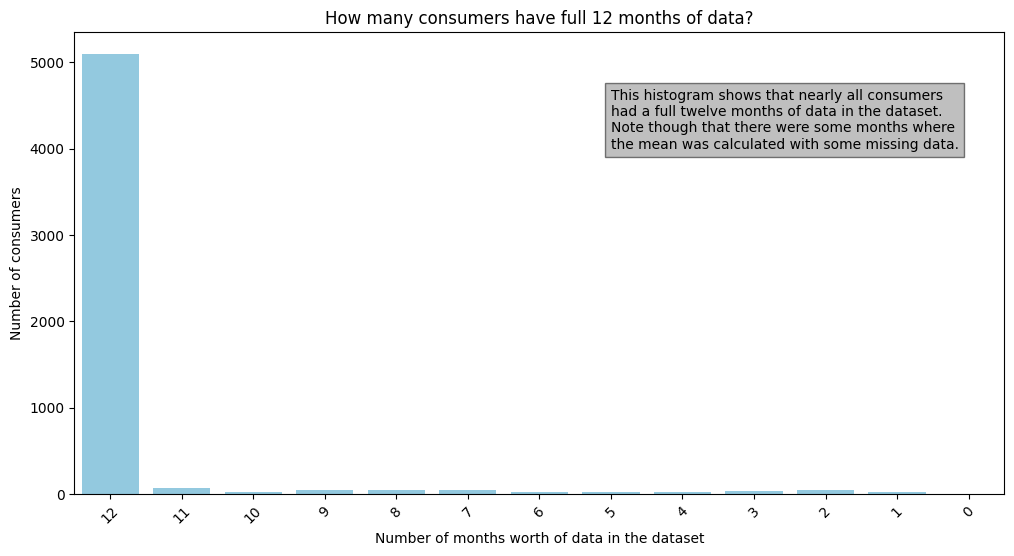

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('data_2013/summary_2013.csv')

# Calculate the number of non-zero values for each LCLid across the months
non_zero_counts = (df.iloc[:, 5:] > 0).sum(axis=1)

# Aggregate the counts based on the number of non-zero values
aggregated_counts = non_zero_counts.value_counts().sort_index(ascending=False)

# Plot the distribution of LCLids based on the number of non-zero values
plt.figure(figsize=(12, 6))
sns.barplot(x=aggregated_counts.index, y=aggregated_counts.values, color='skyblue')
plt.xlabel('Number of months worth of data in the dataset')
plt.ylabel('Number of consumers')
plt.title('How many consumers have full 12 months of data?')

plt.xticks(rotation=45)
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.text(5,4000, 'This histogram shows that nearly all consumers\nhad a full twelve months of data in the dataset.\nNote though that there were some months where\nthe mean was calculated with some missing data.', fontsize=10, bbox=dict(facecolor='grey', alpha=0.5))
plt.show()

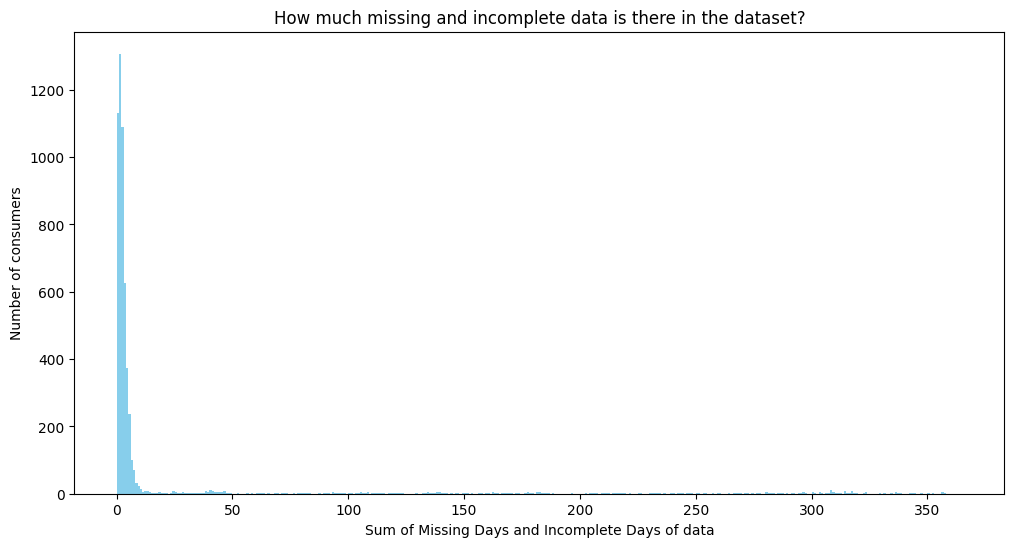

In [6]:
# Calculate the sum of missing_days and incomplete_days for each LCLid
total_missing_incomplete = df['missing_days'] + df['incomplete_days']

# Create a histogram showing the number of LCLids with the sum of missing_days and incomplete_days
plt.figure(figsize=(12, 6))
plt.hist(total_missing_incomplete, bins=range(366), color='skyblue')
plt.xlabel('Sum of Missing Days and Incomplete Days of data')
plt.ylabel('Number of consumers')
plt.title('How much missing and incomplete data is there in the dataset?')
#plt.gca().invert_xaxis()  # Reverse the x-axis
#plt.text(200, 1100, 'This histogram shows that most consumers\nhad under ten days worth of missing+incomplete\ndata in the dataset', fontsize=10, bbox=dict(facecolor='grey', alpha=0.5))

plt.show()

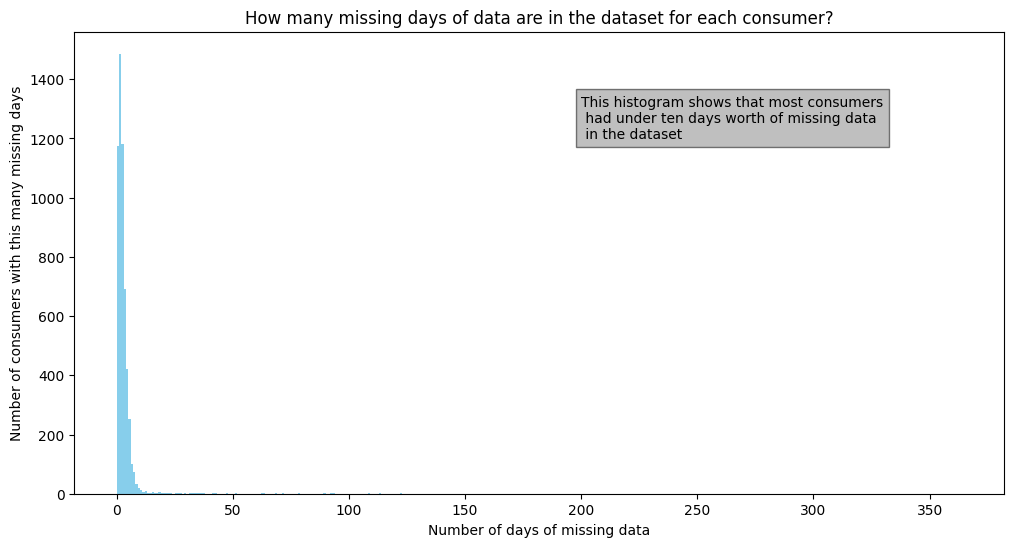

In [94]:
# Create a histogram showing the frequency of missing_days
plt.figure(figsize=(12, 6))
plt.hist(df['incomplete_days'], bins=range(365), color='skyblue')
plt.xlabel('Number of days of missing data')
plt.ylabel('Number of consumers with this many missing days')
plt.title('How many missing days of data are in the dataset for each consumer?')
#plt.gca().invert_xaxis()  # Reverse the x-axis
plt.text(200, 1200, 'This histogram shows that most consumers\n had under ten days worth of missing data\n in the dataset', fontsize=10, bbox=dict(facecolor='grey', alpha=0.5))

plt.show()

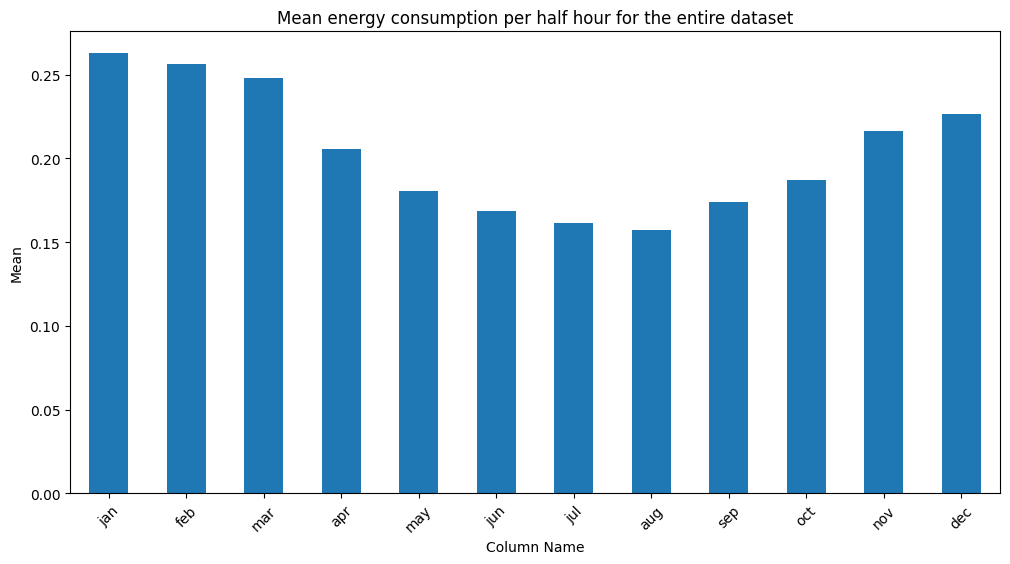

In [95]:
# Calculate the mean for each month
mean_values = df[df.columns[5:]].mean()
plt.figure(figsize=(12, 6))
# Create a bar plot for the mean values
mean_values.plot(kind='bar')

plt.xlabel('Column Name')
plt.ylabel('Mean')
plt.title('Mean energy consumption per half hour for the entire dataset')
plt.xticks(rotation=45)
plt.show()

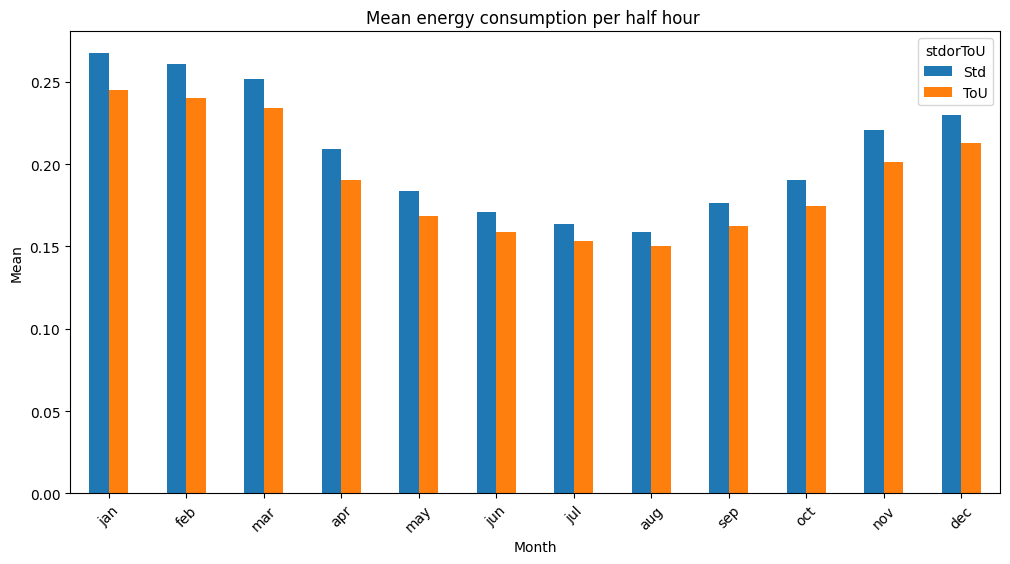

In [96]:
# Split the DataFrame into two groups based on the 'stdorToU' column
grouped = df.groupby('stdorToU')[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].mean()

# Create a bar plot for the mean values of each group
grouped.T.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Month')
plt.ylabel('Mean')
plt.title('Mean energy consumption per half hour ')
plt.xticks(rotation=45)
plt.show()

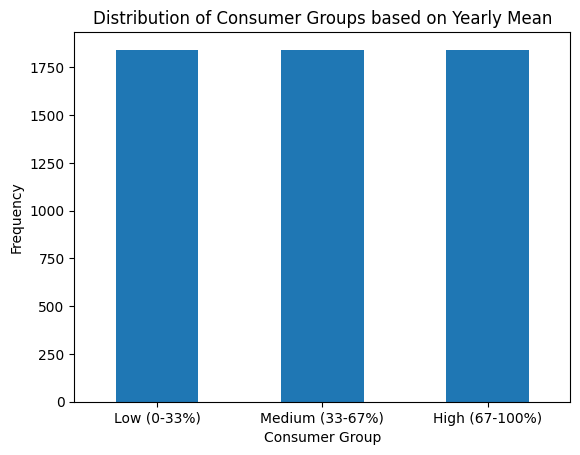

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that the columns used for calculating yearly mean are of numeric data type
df[df.columns[5:]] = df[df.columns[5:]].apply(pd.to_numeric, errors='coerce')

# Calculate the yearly mean for each LCLid
df['yearly_mean'] = df[df.columns[5:]].mean(axis=1)

# Drop rows with missing values if needed
# df = df.dropna(subset=['yearly_mean'])

# Split the LCLids into three groups of low, medium, and high consumers
df['consumer_group'] = pd.qcut(df['yearly_mean'], q=[0, 1/3, 2/3, 1], labels=['low', 'medium', 'high'])

# Create a histogram for the distribution of the yearly_mean for all LCLids based on consumer groups
ax = df['consumer_group'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Low (0-33%)', 'Medium (33-67%)', 'High (67-100%)'], rotation=0)
plt.xlabel('Consumer Group')
plt.ylabel('Frequency')
plt.title('Distribution of Consumer Groups based on Yearly Mean')
plt.show()

In [7]:
df.head()

,LCLid,stdorToU,zero_count,missing_days,incomplete_days,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,MAC000002,Std,0,0,0,0.241849,0.283945,0.322368,0.251797,0.204230,0.208285,0.182225,0.181378,0.223272,0.254147,0.284626,0.253004
1,MAC000003,Std,0,0,2,0.717161,0.797635,0.642681,0.497801,0.250637,0.249011,0.246805,0.238384,0.248198,0.233118,0.372004,0.339640
2,MAC000004,Std,13442,0,1,0.037493,0.042392,0.039778,0.035021,0.033599,0.036027,0.029082,0.030485,0.033056,0.034541,0.035920,0.036737
3,MAC000005,ToU,0,0,1,0.120917,0.112853,0.112132,0.091230,0.076731,0.062902,0.079216,0.077956,0.079383,0.090803,0.116810,0.112825
4,MAC000006,Std,1155,0,0,0.055658,0.076816,0.069884,0.063354,0.057894,0.054307,0.060120,0.031666,0.049034,0.060501,0.067329,0.076636


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LCLid            5528 non-null   object 
 1   stdorToU         5528 non-null   object 
 2   zero_count       5528 non-null   int64  
 3   missing_days     5528 non-null   int64  
 4   incomplete_days  5528 non-null   int64  
 5   jan              5528 non-null   float64
 6   feb              5528 non-null   float64
 7   mar              5528 non-null   float64
 8   apr              5527 non-null   float64
 9   may              5527 non-null   float64
 10  jun              5527 non-null   float64
 11  jul              5527 non-null   float64
 12  aug              5527 non-null   float64
 13  sep              5527 non-null   float64
 14  oct              5528 non-null   float64
 15  nov              5528 non-null   float64
 16  dec              5528 non-null   float64
dtypes: float64(12)

In [17]:
df.describe()

,zero_count,missing_days,incomplete_days,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
count,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000,5527.000000,5527.000000,5527.000000,5527.000000,5527.000000,5527.000000,5528.000000,5528.000000,5528.000000
mean,210.322540,14.017547,2.404124,0.262715,0.256380,0.248160,0.205436,0.180685,0.168570,0.161649,0.157078,0.173723,0.187012,0.216602,0.226464
std,1150.815133,55.803844,5.201620,0.226910,0.229763,0.223939,0.164632,0.139399,0.125482,0.116717,0.114291,0.135234,0.150302,0.190855,0.203027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.125630,0.119962,0.115380,0.102268,0.093124,0.088423,0.087720,0.083429,0.087909,0.092353,0.101798,0.100975
50%,0.000000,0.000000,2.000000,0.202617,0.196565,0.188917,0.166290,0.150800,0.143193,0.138889,0.135253,0.147801,0.157241,0.173601,0.179806
75%,0.000000,0.000000,3.000000,0.319900,0.310027,0.304324,0.261417,0.230068,0.218944,0.209493,0.207467,0.227086,0.247085,0.279132,0.294174
max,17518.000000,356.000000,122.000000,2.248711,2.711630,2.697238,2.122898,2.242137,1.975262,1.827406,1.812091,2.047346,2.313659,2.623940,2.441517
